In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
clean_data_path = '../dataset/cars_data_cleaning_17.csv'
data = pd.read_csv(clean_data_path, encoding='latin-1')
data = data.select_dtypes(exclude=['int64', 'object'])
for column_name in data.columns:
    min_value = data[column_name].min()
    max_value = data[column_name].max()

    print(f"Column: {column_name}")
    print(f"Min Value: {min_value}")
    print(f"Max Value: {max_value}")
    print("\n")

Column: accelerationTime
Min Value: 4.2
Max Value: 21.9


Column: cargoVolume
Min Value: 90.0
Max Value: 8400.0


Column: curbWeight
Min Value: 625.0
Max Value: 2404.0


Column: emissionsCO2
Min Value: 14.0
Max Value: 365.0


Column: engineCapacity
Min Value: 658.0
Max Value: 3222.0


Column: fuelCapacity
Min Value: 10.0
Max Value: 100.0


Column: fuelConsumption
Min Value: 0.9
Max Value: 999.9


Column: height
Min Value: 1225.0
Max Value: 2497.0


Column: length
Min Value: 2985.0
Max Value: 5399.0


Column: payload
Min Value: 215.0
Max Value: 1505.0


Column: price
Min Value: 6.99
Max Value: 111.85


Column: roofLoad
Min Value: 0.0
Max Value: 280.0


Column: seatingCapacity
Min Value: 2.0
Max Value: 9.0


Column: speed
Min Value: 130.0
Max Value: 285.0


Column: torque
Min Value: 53.0
Max Value: 740.0


Column: vEengineDisplacement
Min Value: 658.0
Max Value: 3222.0


Column: vEenginePower
Min Value: 31.0
Max Value: 340.0


Column: weightTotal
Min Value: 1050.0
Max Value: 3230.0


Col

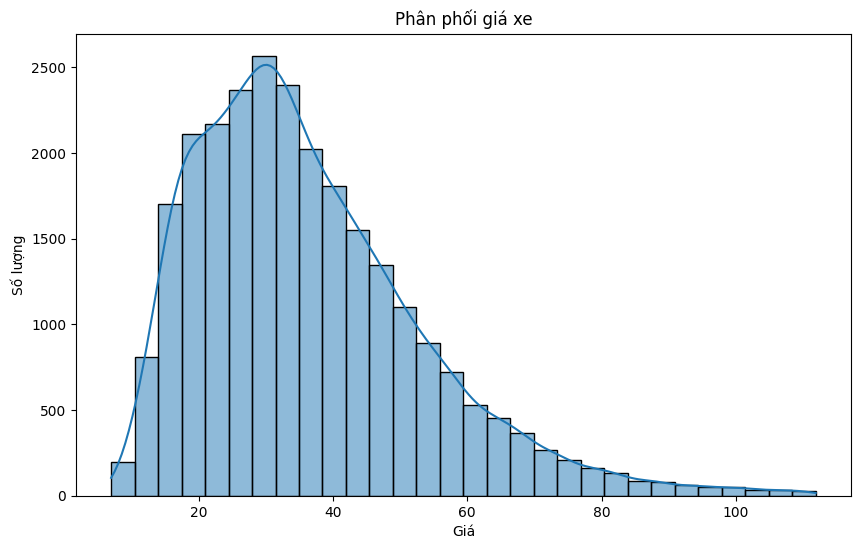

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

clean_data_path = '../dataset/cars_data_cleaning_17.csv'
data = pd.read_csv(clean_data_path, encoding='latin-1')
plt.figure(figsize=(10,6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Phân phối giá xe')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.show()



In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         26304 non-null  float64
 1   bodyType                 26304 non-null  object 
 2   brand                    26304 non-null  object 
 3   cargoVolume              26304 non-null  float64
 4   curbWeight               26304 non-null  float64
 5   driveWheelConfiguration  26304 non-null  object 
 6   eLabel                   26304 non-null  object 
 7   emissionsCO2             26304 non-null  float64
 8   engineCapacity           26304 non-null  float64
 9   fuelCapacity             26304 non-null  float64
 10  fuelConsumption          26304 non-null  float64
 11  fuelType                 26304 non-null  object 
 12  height                   26304 non-null  float64
 13  length                   26304 non-null  float64
 14  model                 

In [4]:
data['vehicleTransmission']

# modelDate

0        Manual transmission
1                  Automatic
2        Manual transmission
3                  Automatic
4        Manual transmission
                ...         
26299    Manual transmission
26300    Manual transmission
26301    Manual transmission
26302    Manual transmission
26303    Manual transmission
Name: vehicleTransmission, Length: 26304, dtype: object

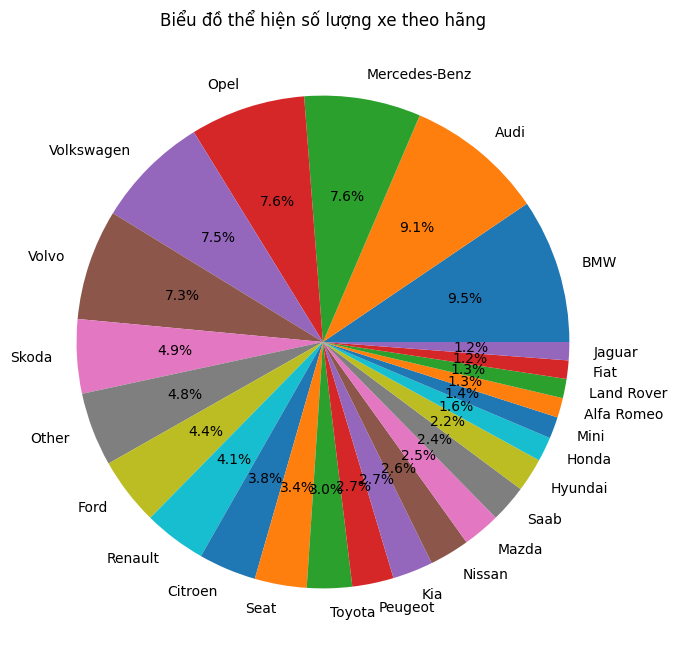

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Tính tỷ lệ phần trăm cho các hãng
brand_counts = data['brand'].value_counts()
total_counts = len(data)
brand_percentages = brand_counts / total_counts * 100

# Gộp các hãng dưới 1% vào nhóm 'Khác'
threshold = 1.0
brands_to_group = brand_percentages[brand_percentages < threshold].index
data['brand'] = data['brand'].apply(lambda x: 'Other' if x in brands_to_group else x)

# Tính lại số lượng cho nhóm 'Khác'
new_brand_counts = data['brand'].value_counts()

# Vẽ biểu đồ mới
plt.figure(figsize=(15, 8))
new_brand_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('Biểu đồ thể hiện số lượng xe theo hãng')
plt.show()


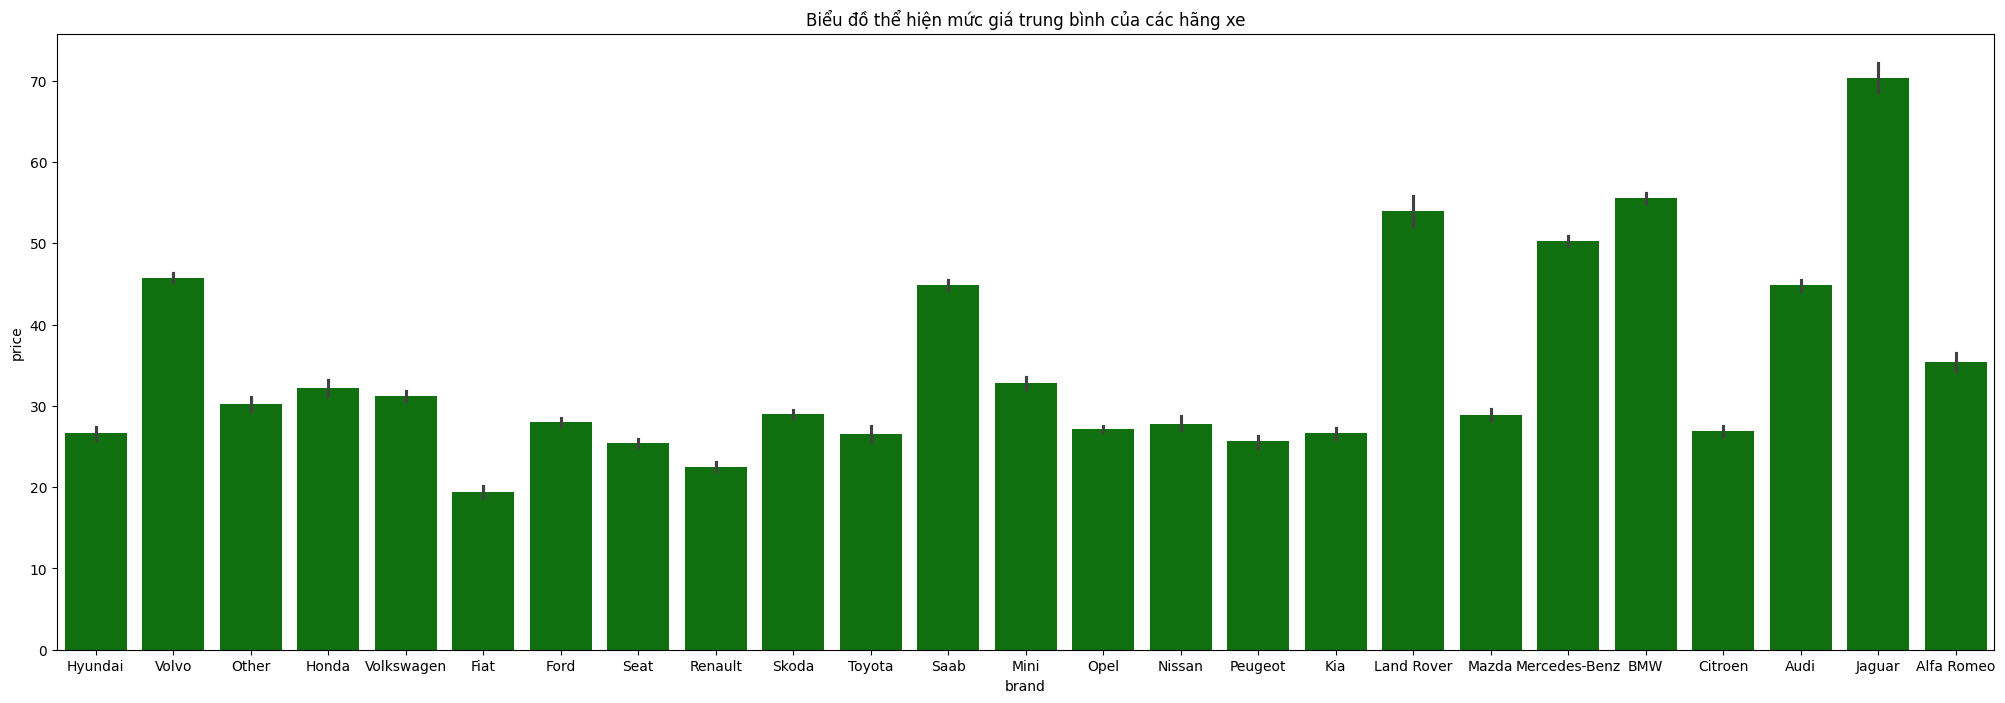

In [6]:
# bar chart thể hiên mức giá trung bình của các hãng xe
plt.figure(figsize=(25, 8))
sns.barplot(x='brand', y='price', data=data, color='green')
plt.title('Biểu đồ thể hiện mức giá trung bình của các hãng xe')
plt.show()


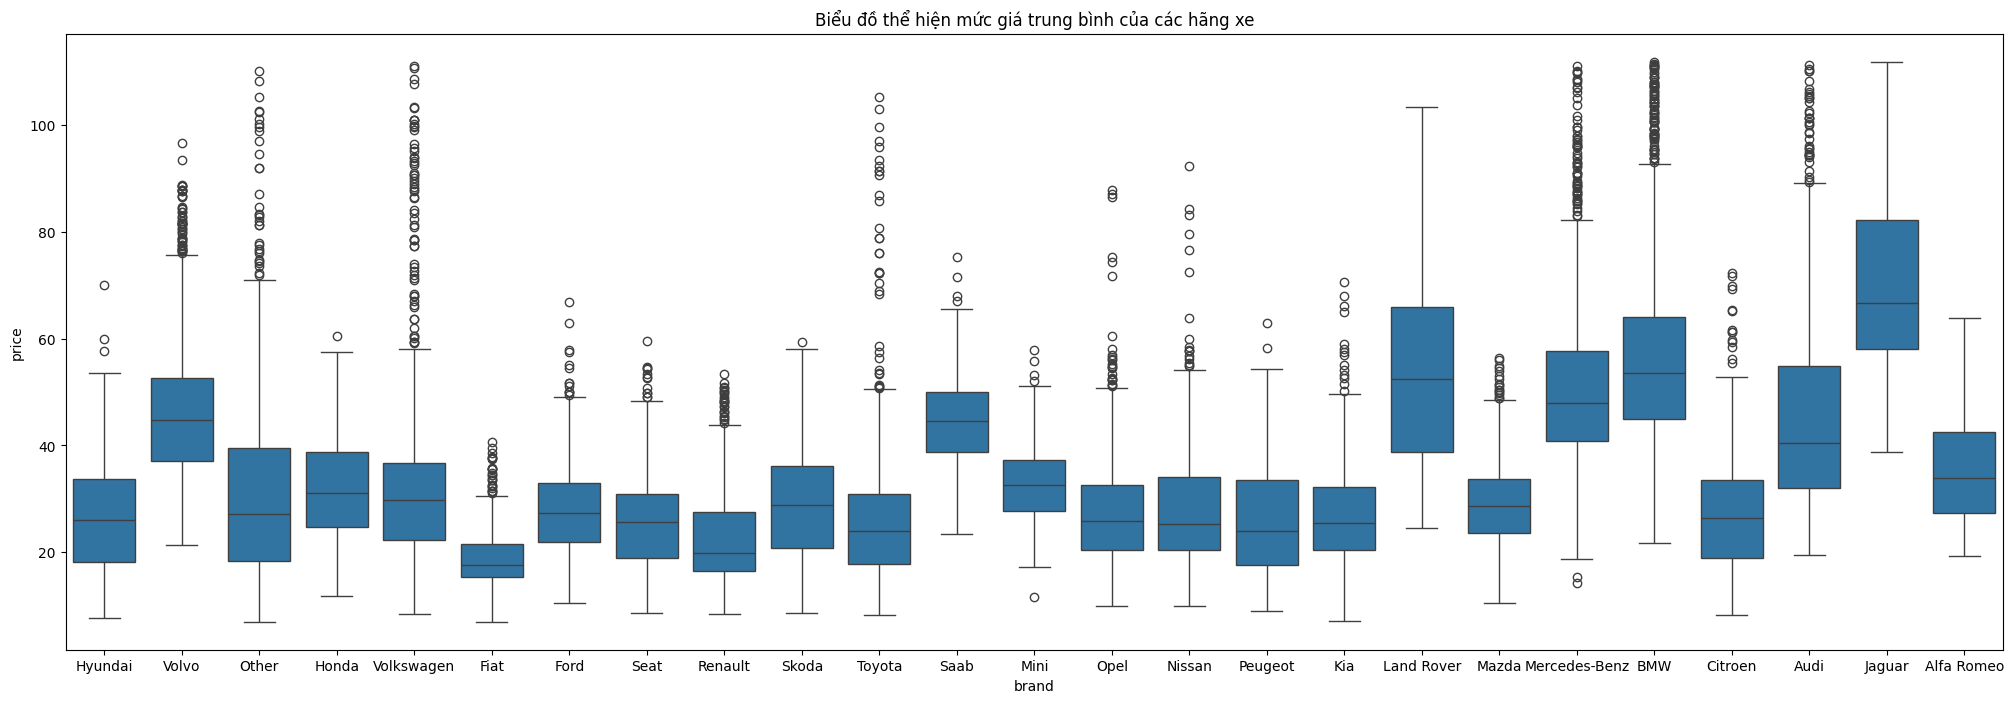

In [7]:
# box plot thể hiện mức giá trung bình của các hãng xe
plt.figure(figsize=(25, 8))
sns.boxplot(x='brand', y='price', data=data)
plt.title('Biểu đồ thể hiện mức giá trung bình của các hãng xe')
plt.show()

In [1]:
clean_data_path = '../dataset/cars_data_10_cleaning.csv'
data = pd.read_csv(clean_data_path, encoding='latin-1')
data = data.select_dtypes(['int64', 'object'])

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Biểu đồ tương quan giữa các thuộc tính')
plt.show()

NameError: name 'pd' is not defined

Có thể thấy trong bài toán của ta thì có curbWeight, EngineCapacity, fuelCapatity, length, speed, torque, vEngineDisplacement, vEnginePower, weightTotal, wheelbase, width, 

In [9]:
# cov_matrix = np.cov(data, rowvar=False)
# print(cov_matrix)

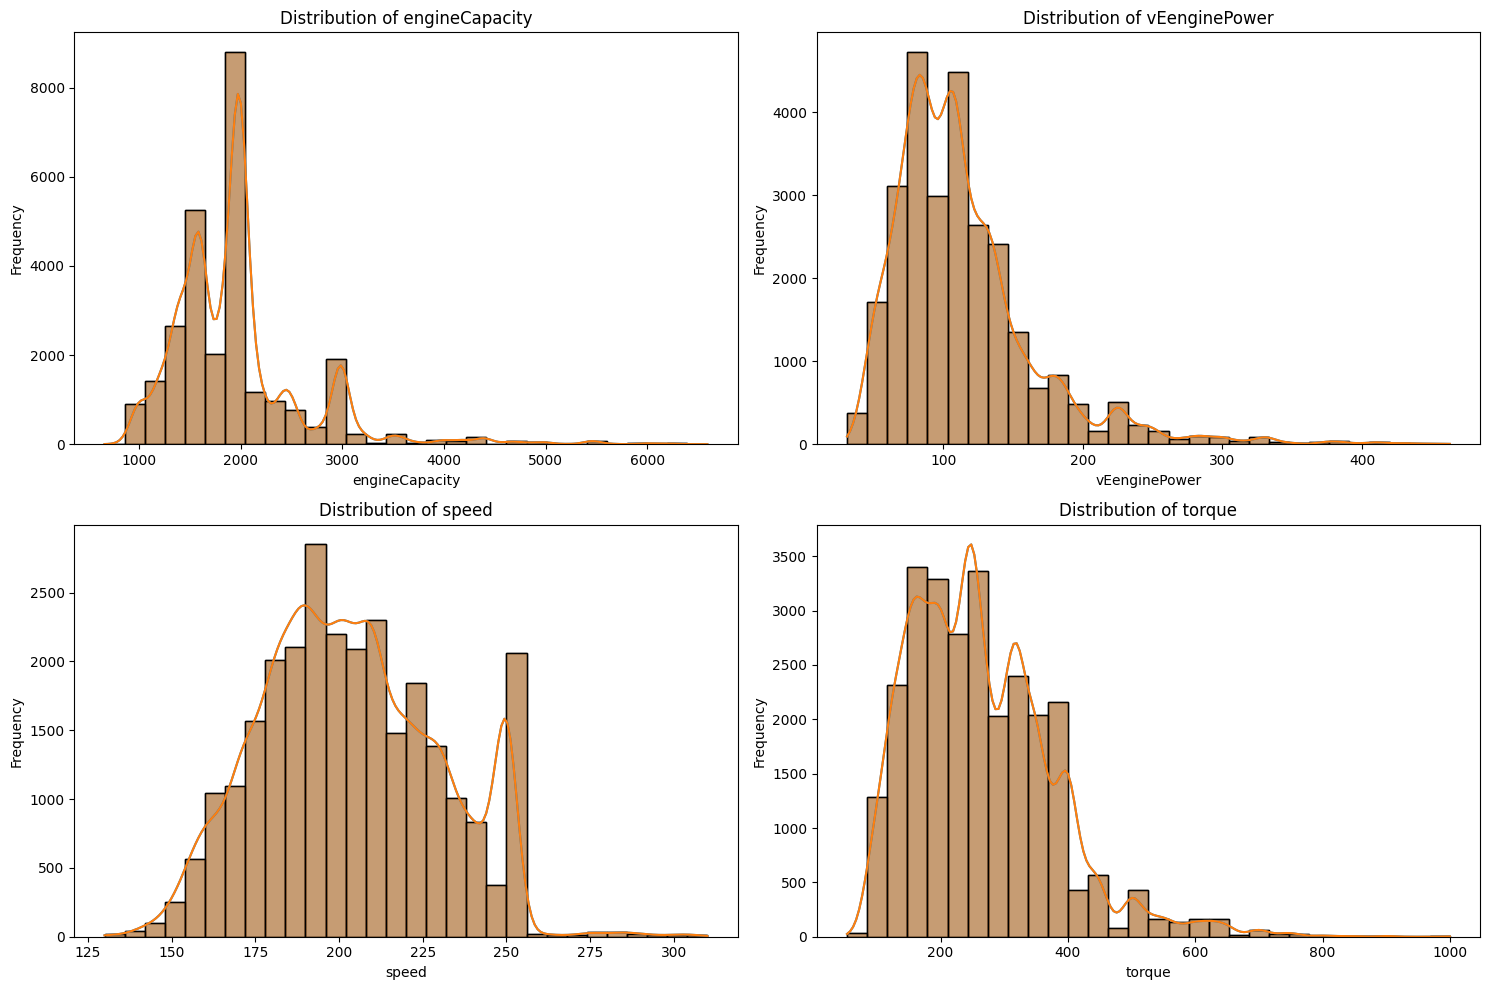

In [10]:
features_to_plot = ['engineCapacity','vEenginePower','speed', 'torque', ]
#fuelCapacity vEengineDisplacement vEenginePower 'curbWeight'  'weightTotal','wheelbase','width'
num_plots = len(features_to_plot)
num_cols = 2
num_rows = num_plots // num_cols if num_plots % num_cols == 0 else num_plots // num_cols + 1

fig_num = 1
plt.figure(fig_num, figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    if i > (num_cols * num_rows * (fig_num - 1)):
        plt.subplot(num_rows, num_cols, i - (num_cols * num_rows * (fig_num - 1)))
        sns.histplot(data[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    else:
        fig_num += 1
        plt.figure(fig_num, figsize=(15, 10))
        plt.subplot(num_rows, num_cols, 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


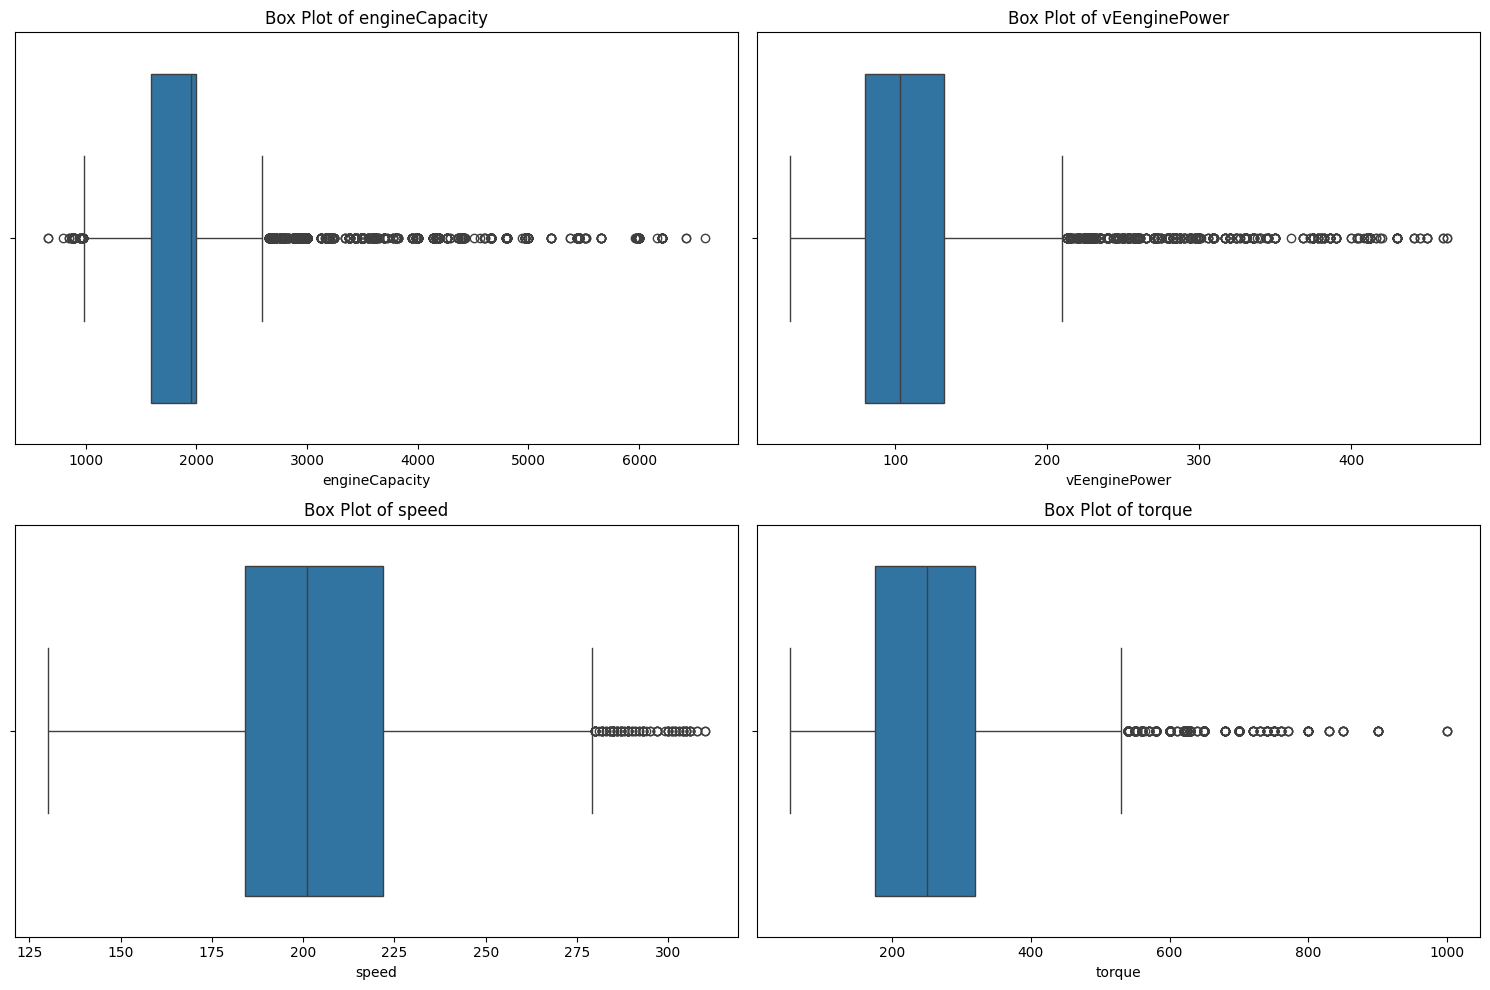

In [11]:
features_to_plot = ['engineCapacity','vEenginePower','speed', 'torque', ]
#fuelCapacity vEengineDisplacement vEenginePower 'curbWeight'  'weightTotal','wheelbase','width'

plt.figure(figsize=(15, 10))

num_plots = len(features_to_plot)
num_cols = 2
num_rows = num_plots // num_cols if num_plots % num_cols == 0 else num_plots // num_cols + 1

fig_num = 1
plt.figure(fig_num, figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    if i > (num_cols * num_rows * (fig_num - 1)):
        plt.subplot(num_rows, num_cols, i - (num_cols * num_rows * (fig_num - 1)))
        sns.boxplot(x=data[feature])
        plt.title(f'Box Plot of {feature}')
    else:
        fig_num += 1
        plt.figure(fig_num, figsize=(15, 10))
        plt.subplot(num_rows, num_cols, 1)
        sns.boxplot(x=data[feature])
        plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

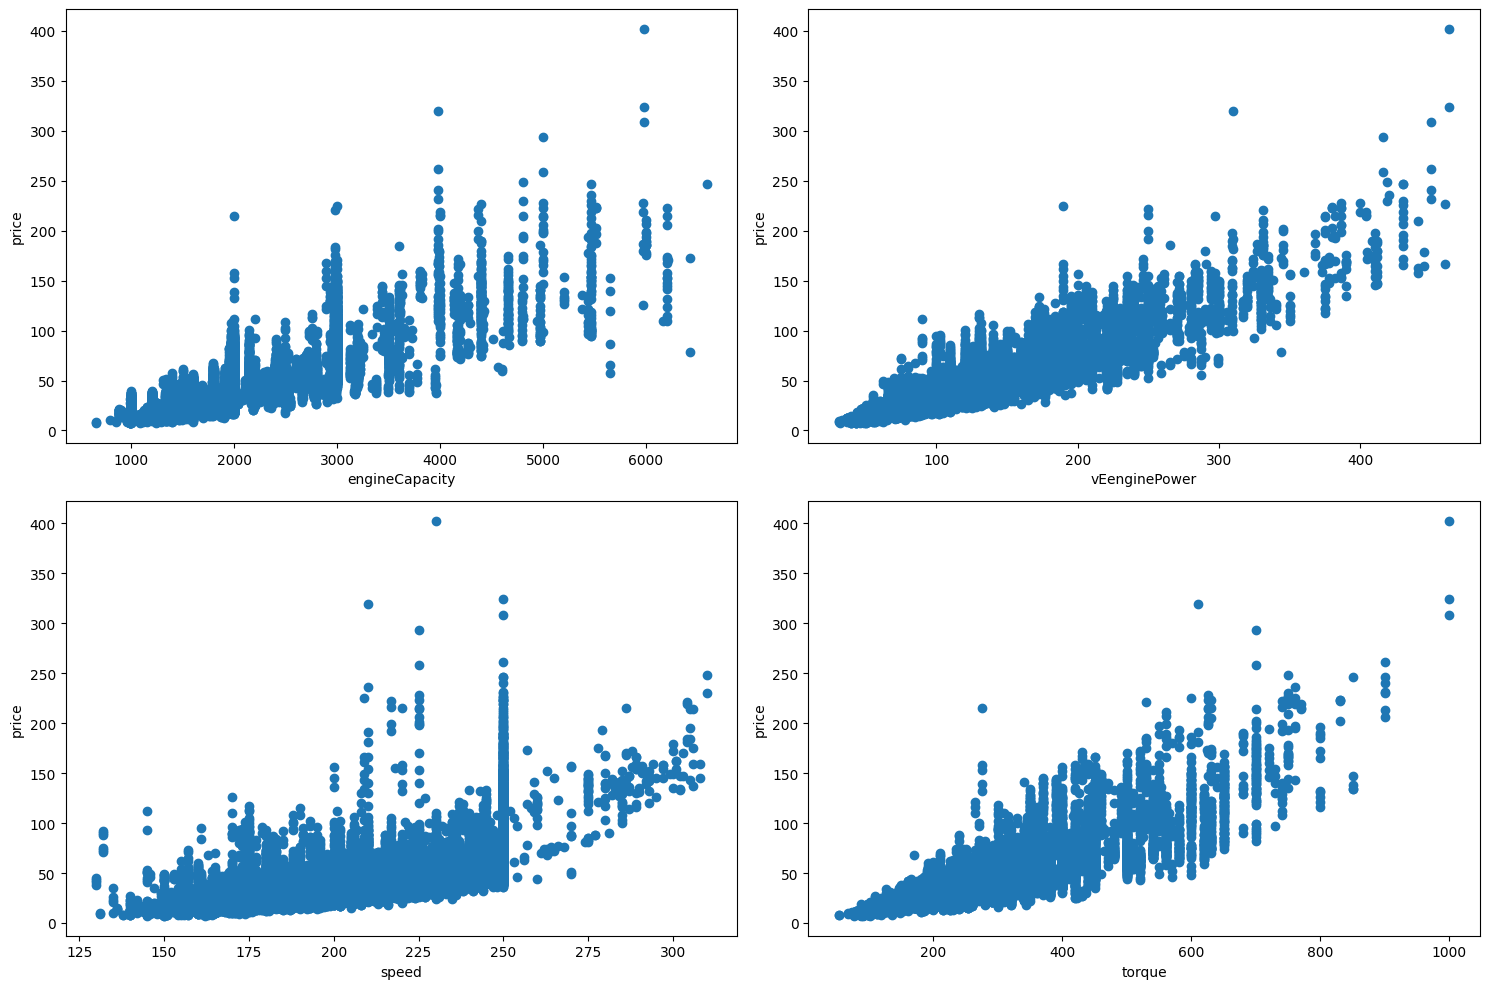

In [12]:
features_to_plot = ['engineCapacity','vEenginePower','speed', 'torque', ]
num_features = len(features_to_plot)

num_rows = num_features // 2
if num_features % 2:
    num_rows += 1

fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))

for i, feature in enumerate(features_to_plot):
    row = i // 2
    col = i % 2
    df = pd.concat([data['price'], data[feature]], axis=1)
    axs[row, col].scatter(df[feature], df['price'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('price')

if num_features % 2:
    for col in range(num_features % 2, 2):
        fig.delaxes(axs[num_rows-1, col])

plt.tight_layout()
plt.show()

In [21]:
clean_data_path = '../dataset/cars_data_cleaning_17.csv'
data = pd.read_csv(clean_data_path, encoding='latin-1')
data_1 = data
data_1

,accelerationTime,bodyType,brand,cargoVolume,curbWeight,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,...,seatingCapacity,speed,torque,vEengineDisplacement,vEenginePower,vEengineType,vehicleTransmission,weightTotal,wheelbase,width
0,11.2,"4-doors, sedan",Hyundai,376.0,1068.0,front,g,174.0,1495.0,55.0,...,5.0,178.0,129.0,1495.0,65.0,fuel engine,Manual transmission,1650.0,2550.0,1700.0
1,13.6,"4-doors, sedan",Hyundai,376.0,1093.0,front,g,210.0,1495.0,55.0,...,5.0,166.0,129.0,1495.0,65.0,fuel engine,Automatic,1650.0,2550.0,1700.0
2,8.8,"4-doors, sedan",Hyundai,376.0,1126.0,front,g,196.0,1976.0,55.0,...,5.0,202.0,182.0,1976.0,102.0,fuel engine,Manual transmission,1685.0,2550.0,1700.0
3,11.1,"4-doors, sedan",Hyundai,376.0,1156.0,front,g,229.0,1976.0,55.0,...,5.0,187.0,182.0,1976.0,102.0,fuel engine,Automatic,1685.0,2550.0,1700.0
4,10.5,"4-doors, sedan",Hyundai,376.0,1085.0,front,g,184.0,1599.0,55.0,...,5.0,193.0,143.0,1599.0,84.0,fuel engine,Manual transmission,1685.0,2550.0,1700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,6.7,"3-doors, coupÃ©",Alfa Romeo,320.0,1385.0,front,g,295.0,3179.0,63.0,...,5.0,243.0,300.0,3179.0,176.0,fuel engine,Manual transmission,1930.0,2596.0,1763.0
26300,9.6,"3-doors, coupÃ©",Alfa Romeo,320.0,1340.0,front,g,178.0,1910.0,63.0,...,5.0,209.0,305.0,1910.0,110.0,fuel engine,Manual transmission,1885.0,2596.0,1763.0
26301,9.2,"3-doors, coupÃ©",Alfa Romeo,320.0,1340.0,front,g,159.0,1910.0,63.0,...,5.0,209.0,305.0,1910.0,110.0,fuel engine,Manual transmission,1885.0,2596.0,1763.0
26302,9.2,"3-doors, coupÃ©",Alfa Romeo,320.0,1340.0,front,g,159.0,1910.0,63.0,...,5.0,209.0,305.0,1910.0,110.0,fuel engine,Manual transmission,1885.0,2596.0,1763.0


In [22]:
def categorical_relation(var):
    df = pd.concat([data['price'], data[var]], axis=1)
    f, ax = plt.subplots(figsize=(15, 6))
    fig = sns.boxplot(x=var, y="price", data=df)
    feature_counts = data[var].value_counts()
    
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=data['torque'], y=data['price'], hue=data[var])
    plt.title('Scatterplot of Price and Torque by Non-Numeric Feature')
    plt.show()
    
    plt.figure(figsize=(10,8))
    plt.pie(feature_counts, labels = feature_counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {var}')
    plt.show()
    return fig


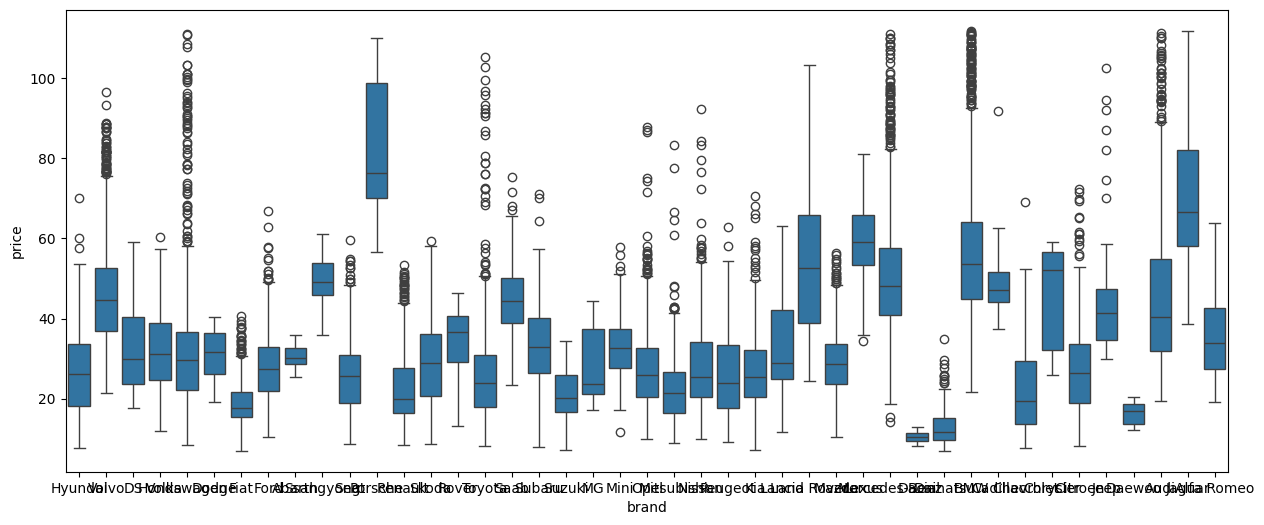

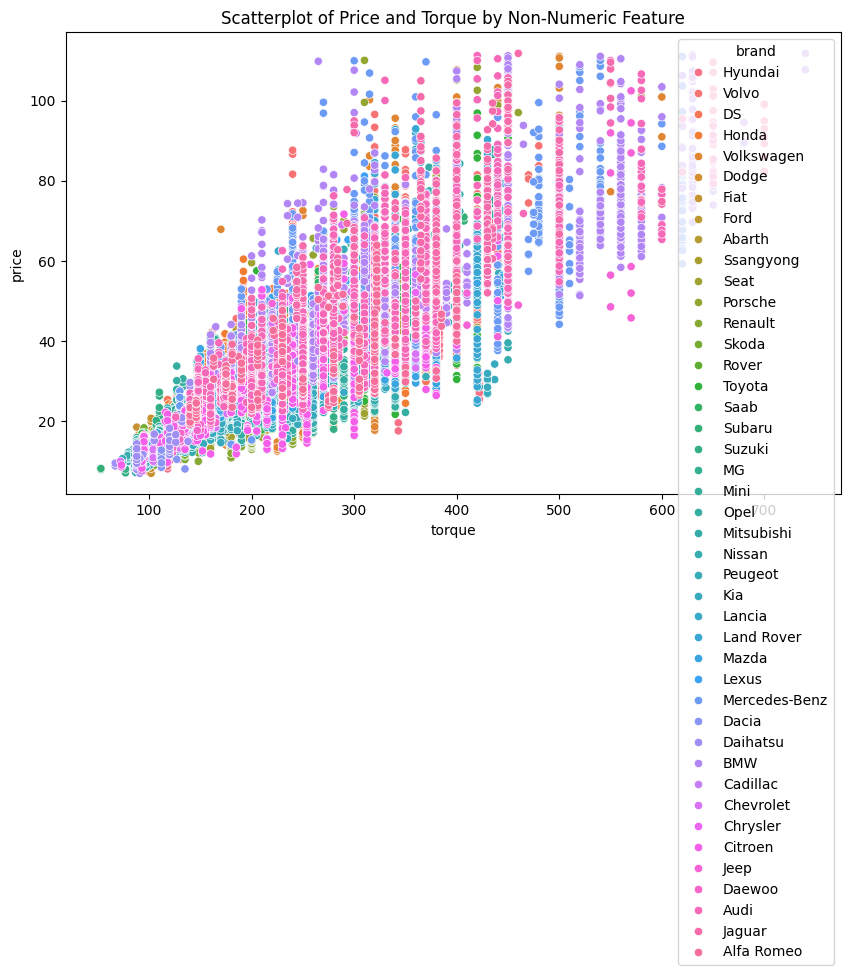

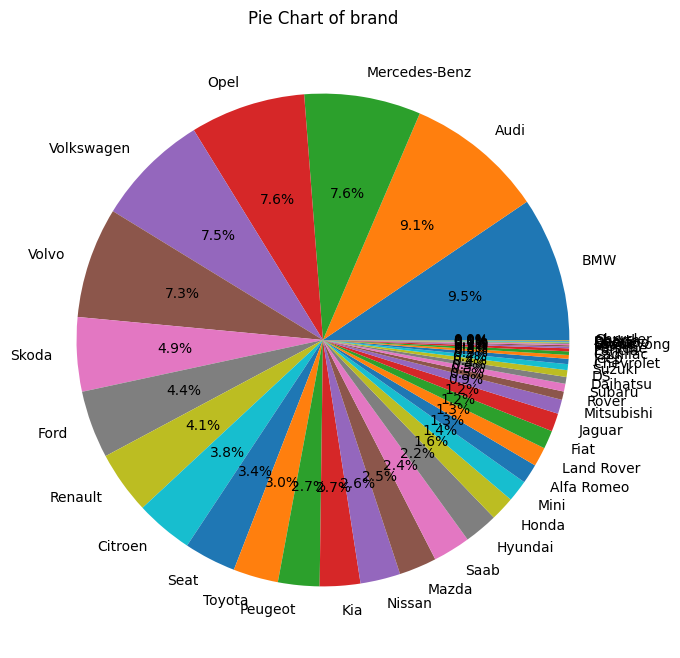

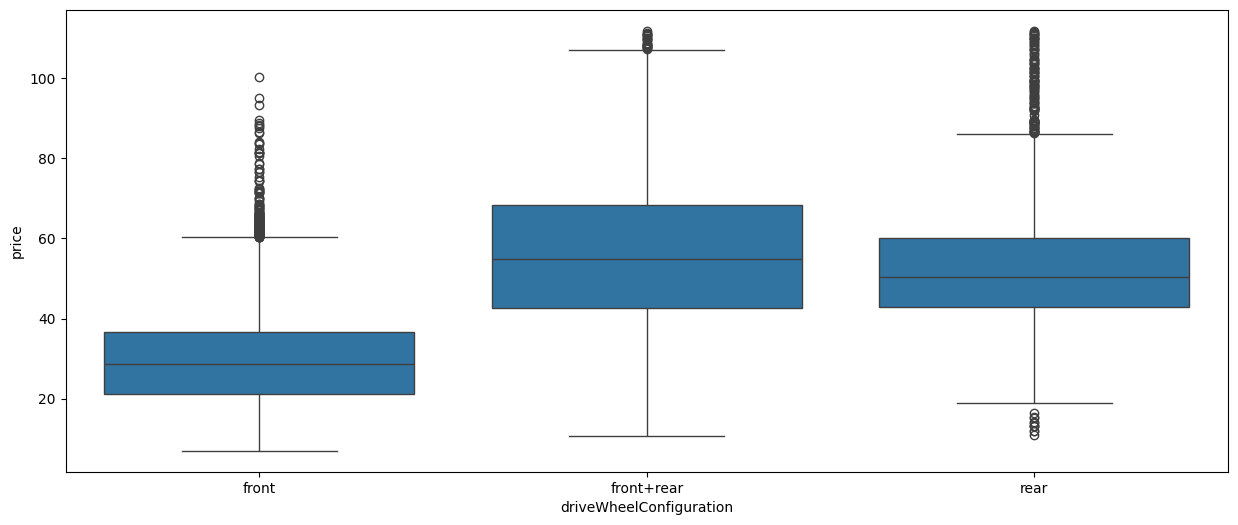

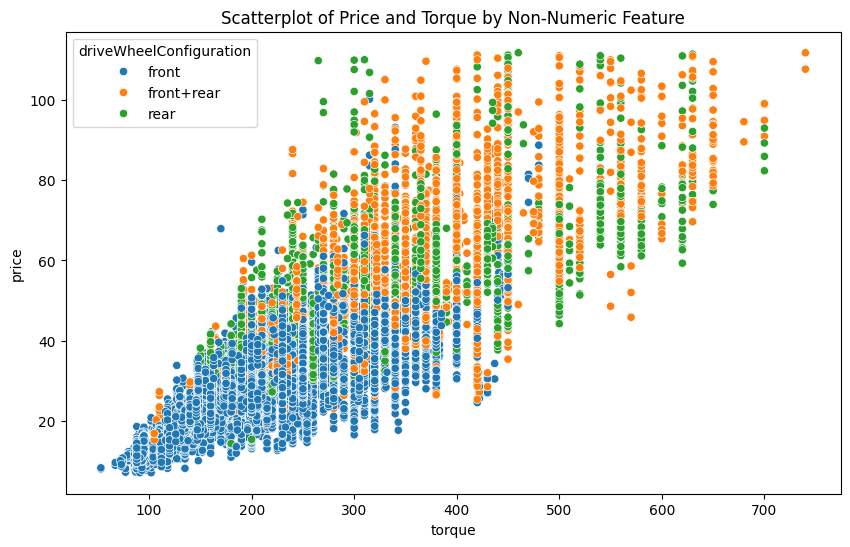

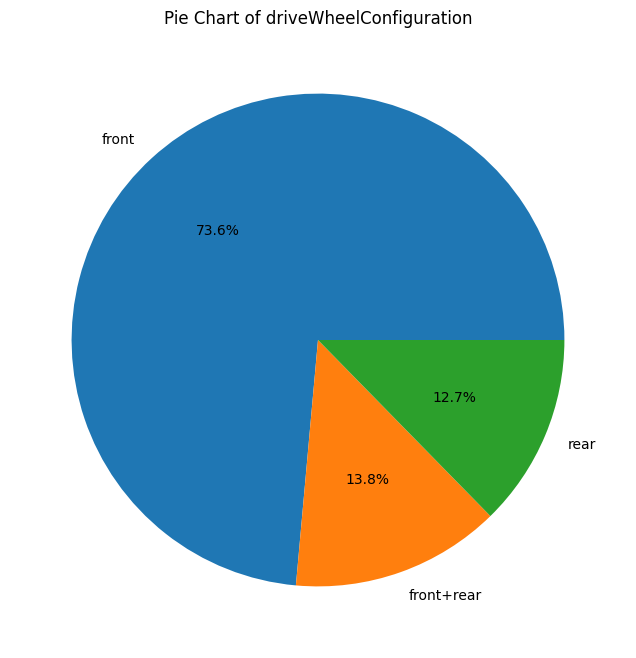

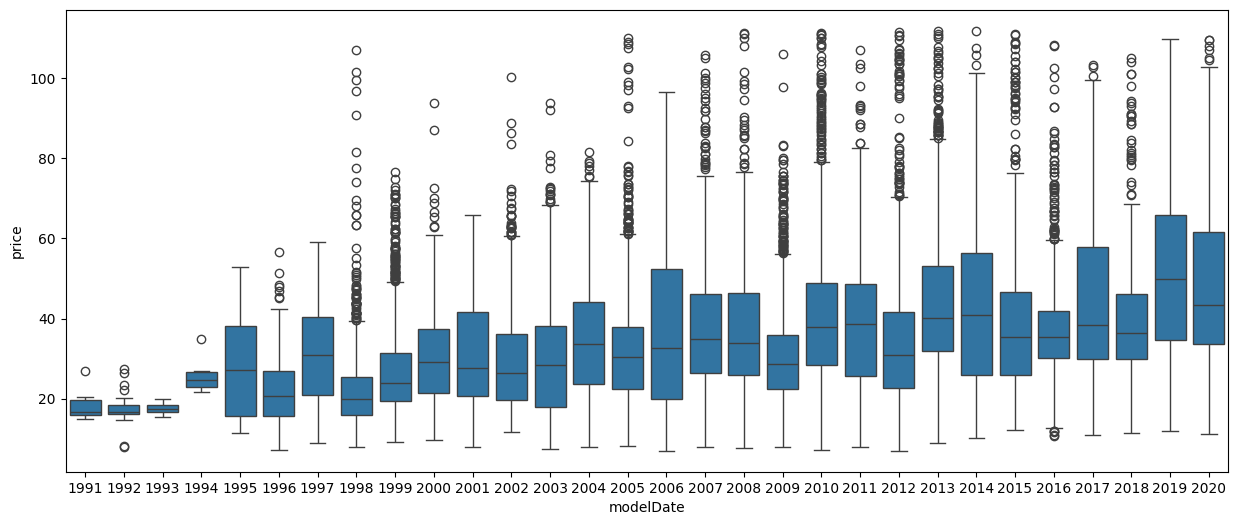

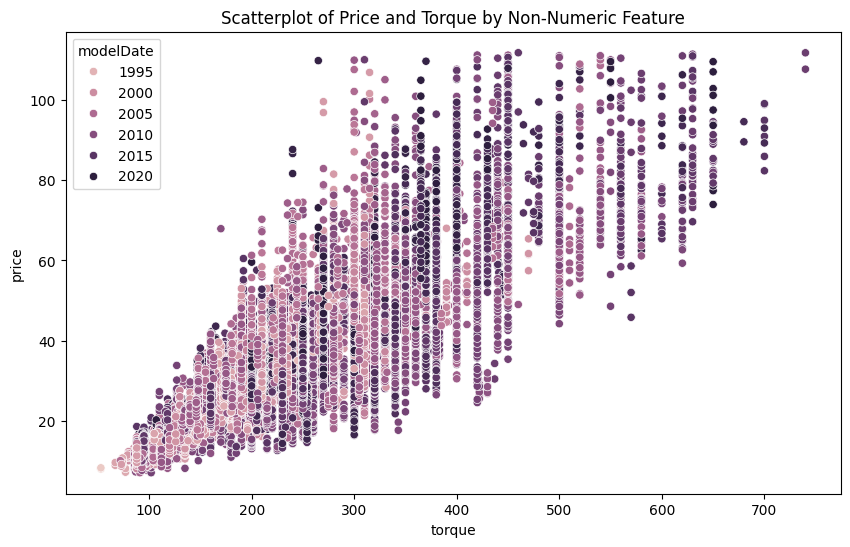

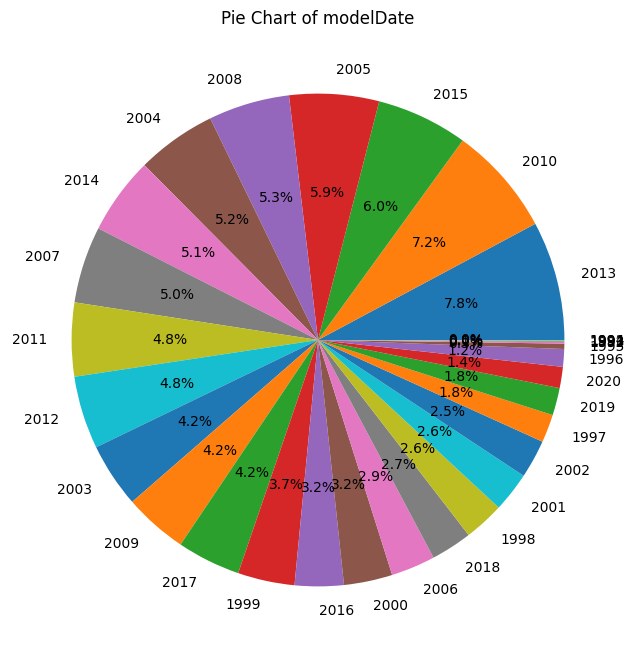

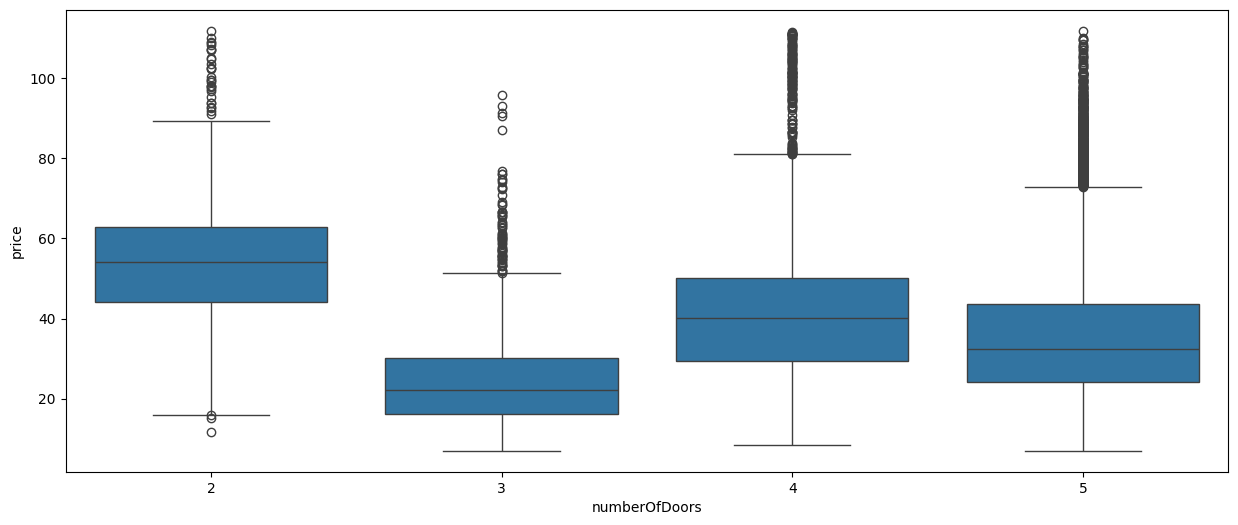

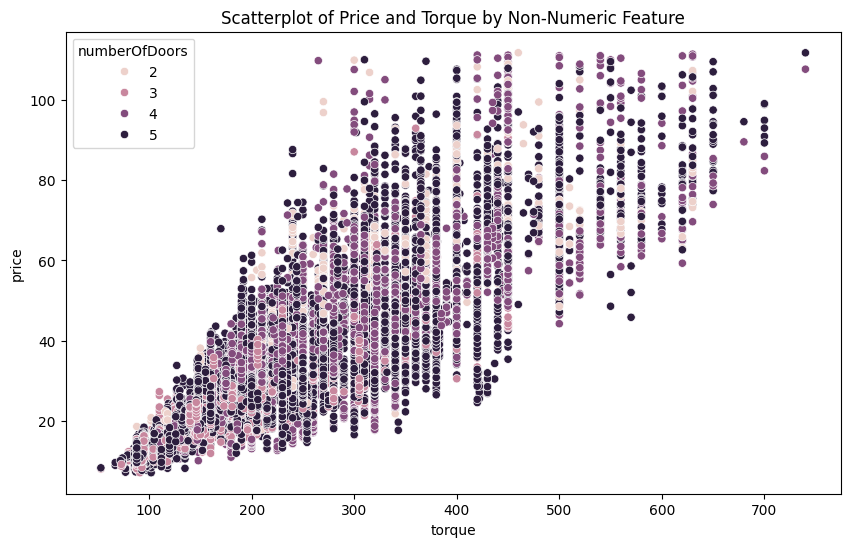

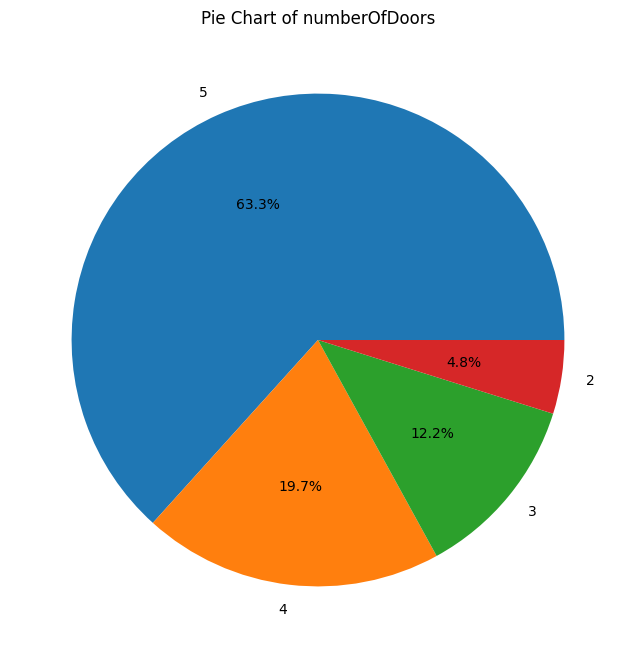

In [23]:
features_to_plot = ['brand','driveWheelConfiguration','modelDate', 'numberOfDoors']
for i, feature in enumerate(features_to_plot):
    categorical_relation(feature)

Bỏ vEengineType, modelDate